#Assignment 1: The sinking of the Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t
enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224
passengers and crew. While there was some element of luck involved in surviving, it seems some groups of
people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). Dataset link: https://www.kaggle.com/c/titanic/data



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.drop('Cabin', inplace = True, axis = 1)

In [ ]:
data.shape

(891, 11)

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [ ]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
data.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data['Embarked'] = data['Embarked'].astype('category')

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Age'] = data['Age'].astype('int')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    int64   
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(4), float64(1), int64(3)
memory usage: 31.9 KB


In [ ]:
data.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


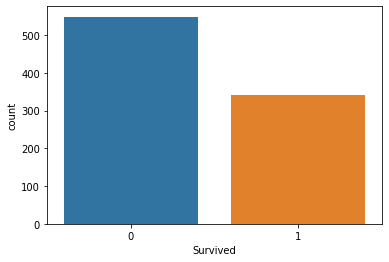

In [ ]:
sns.countplot(data['Survived'])

In [ ]:
death_percent = round((data['Survived'].value_counts().values[0]/891)*100)

In [ ]:
print('Out of 891 people {} % people died in the accident'. format(death_percent))

Out of 891 people 62 % people died in the accident


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


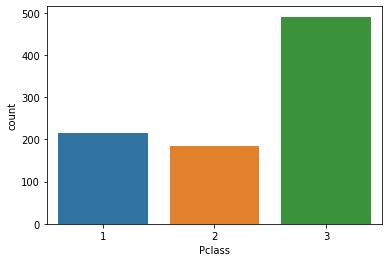

In [ ]:
print((data['Pclass'].value_counts()/891)*100)
sns.countplot(data['Pclass'])

male      64.758698
female    35.241302
Name: Sex, dtype: float64


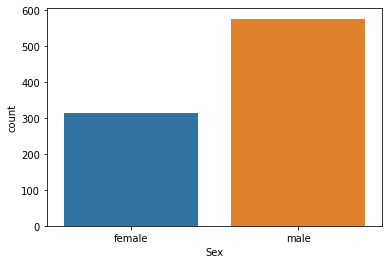

In [ ]:
print((data['Sex'].value_counts()/891)*100)
sns.countplot(data['Sex'])

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


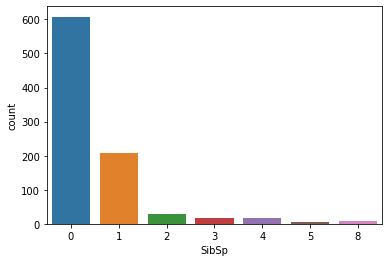

In [ ]:
print((data['SibSp'].value_counts()/891)*100)
sns.countplot(data['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


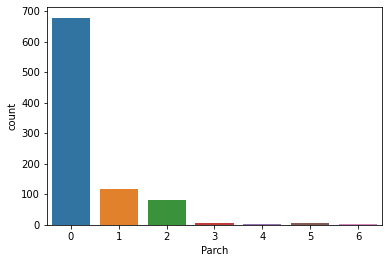

In [ ]:
print((data['Parch'].value_counts()/891)*100)
sns.countplot(data['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


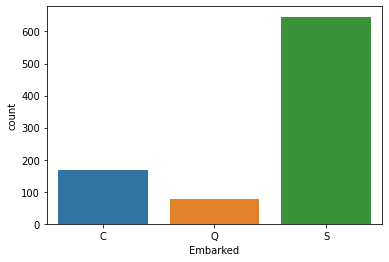

In [ ]:
print((data['Embarked'].value_counts()/891)*100)
sns.countplot(data['Embarked'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577


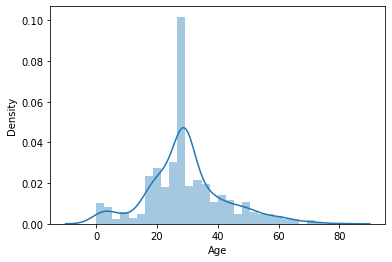

In [ ]:
sns.distplot(data['Age'])
print(data['Age'].skew())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


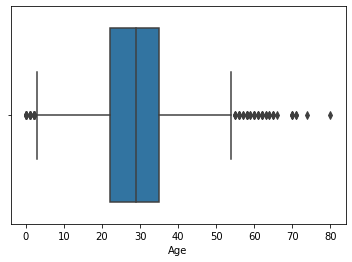

In [ ]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


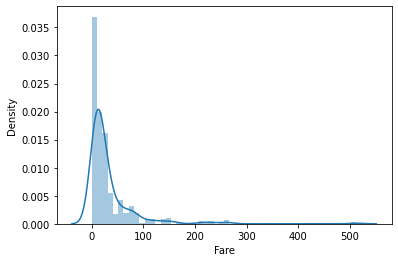

In [ ]:
sns.distplot(data['Fare'])

In [ ]:
data['Fare'].skew()

4.787316519674893

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


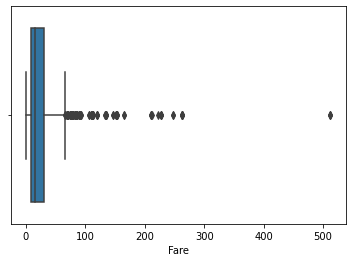

In [ ]:
sns.boxplot(data['Fare'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


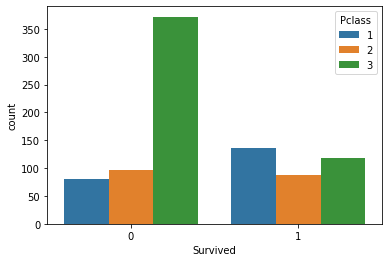

In [ ]:
sns.countplot(data['Survived'], hue=data['Pclass'])
pd.crosstab(data['Pclass'], data['Survived'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Sex,,
female,81,233
male,468,109


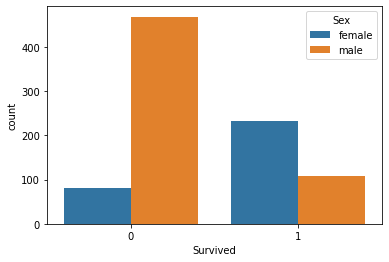

In [ ]:
sns.countplot(data['Survived'], hue=data['Sex'])
pd.crosstab(data['Sex'], data['Survived'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


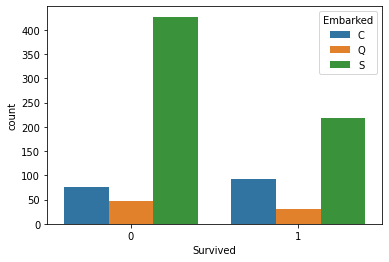

In [ ]:
sns.countplot(data['Survived'], hue=data['Embarked'])
pd.crosstab(data['Embarked'], data['Survived'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


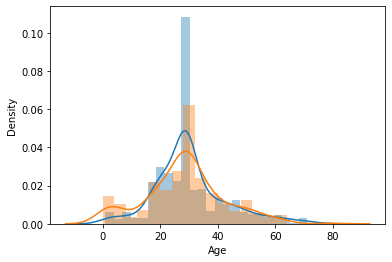

In [ ]:
sns.distplot(data[data['Survived']==0]['Age'])
sns.distplot(data[data['Survived']==1]['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


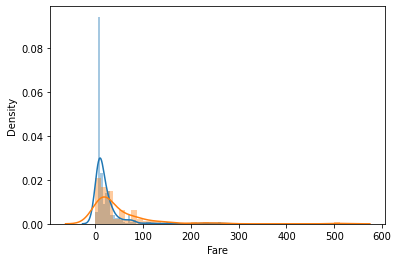

In [ ]:
sns.distplot(data[data['Survived']==0]['Fare'])
sns.distplot(data[data['Survived']==1]['Fare'])

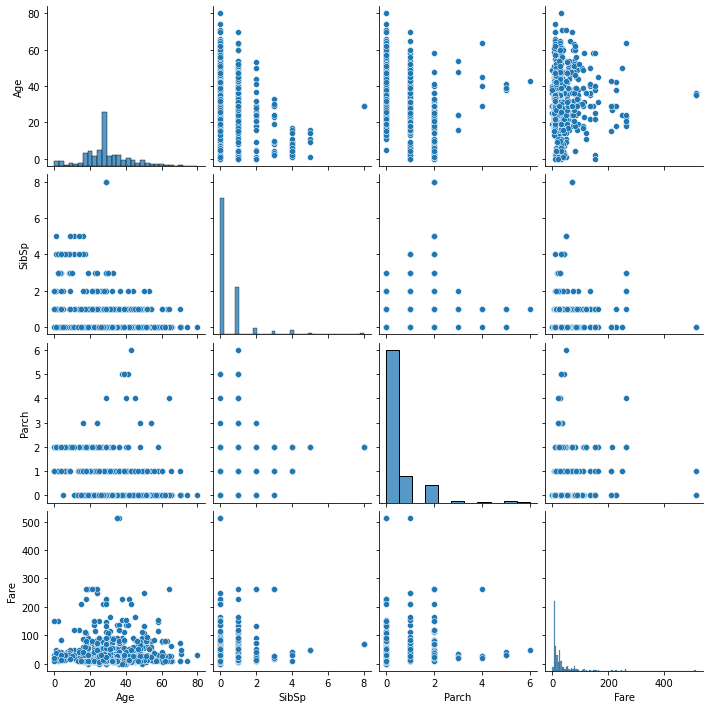

In [ ]:
sns.pairplot(data)

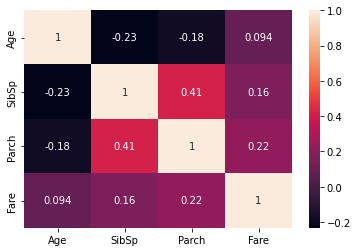

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data = pd.get_dummies(data = data, columns=['Sex','Embarked'], drop_first=True)

In [ ]:
X = data.drop(columns = ['Survived'], axis =1 )

In [ ]:
X 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,7.2500,1,0,1
1,1,38,1,0,71.2833,0,0,0
2,3,26,0,0,7.9250,0,0,1
3,1,35,1,0,53.1000,0,0,1
4,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1
887,1,19,0,0,30.0000,0,0,1
888,3,29,1,2,23.4500,0,0,1
889,1,26,0,0,30.0000,1,0,0


In [ ]:
y = data['Survived'].values

In [ ]:
y[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y = to_categorical(y)

In [ ]:
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense

In [ ]:
model = Sequential() 

In [ ]:
model.add(Dense(520, activation = 'relu', input_dim = 8)) 
model.add(Dense(228, activation = 'relu')) 

model.add(Dense(228, activation = 'relu'))

model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax')) 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 520)               4680      
                                                                 
 dense_1 (Dense)             (None, 228)               118788    
                                                                 
 dense_2 (Dense)             (None, 228)               52212     
                                                                 
 dense_3 (Dense)             (None, 50)                11450     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 187,232
Trainable params: 187,232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose =1 , patience = 25)

In [ ]:
history = model.fit(x_train,y_train ,epochs=200, validation_data=(x_test, y_test), callbacks = [es])

Epoch 1/200
23/23 [==============================] - 3s 20ms/step - loss: 0.7919 - accuracy: 0.6278 - val_loss: 0.7207 - val_accuracy: 0.5754
Epoch 2/200
23/23 [==============================] - 0s 11ms/step - loss: 0.6445 - accuracy: 0.6461 - val_loss: 0.7242 - val_accuracy: 0.6592
Epoch 3/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6447 - accuracy: 0.6826 - val_loss: 0.7035 - val_accuracy: 0.6760
Epoch 4/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6133 - accuracy: 0.7093 - val_loss: 0.6474 - val_accuracy: 0.5754
Epoch 5/200
23/23 [==============================] - 0s 9ms/step - loss: 0.5903 - accuracy: 0.7065 - val_loss: 0.6452 - val_accuracy: 0.6872
Epoch 6/200
23/23 [==============================] - 0s 11ms/step - loss: 0.6044 - accuracy: 0.6938 - val_loss: 0.6192 - val_accuracy: 0.6536
Epoch 7/200
23/23 [==============================] - 0s 9ms/step - loss: 0.5859 - accuracy: 0.6924 - val_loss: 0.6382 - val_accuracy: 0.6760
Epoch 8/20

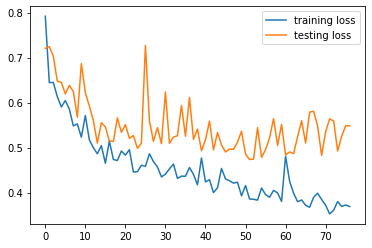

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.legend()
plt.show()
     

In [ ]:
scores = model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7654


In [ ]:
scores

[0.5482850670814514, 0.7653631567955017]

In [ ]:
op = model.predict([[3,22,1,0,7,1,0,1]])


1/1 [==============================] - 0s 81ms/step


In [ ]:
op

array([[0.9543547 , 0.04564528]], dtype=float32)

In [ ]:
if op[0][0] >= 0.50:
    print("0")
else:
    print("1")

0
